<a href="https://colab.research.google.com/github/gizemkaratas/M-teri-Kategorii/blob/main/m%C3%BC%C5%9Fteri_inceleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Müşteri Hareketleri İnceleme**

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [314]:
df = pd.read_csv("customer_shopping_data.csv")

# **Veri Önişleme**

### **Veri İnceleme**

In [315]:
df.shape

(99457, 10)

In [316]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [317]:
# yeni kolon ekleme price/quantity

df["unit_price"] = df["price"]/df["quantity"]
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,unit_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,600.17
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,600.17
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,15.15


In [318]:
# prompt: customerıd de tekrarlayan kaç değer var

df["customer_id"].duplicated().sum()


0

In [319]:
#invoce no da tekrarlayan kaç değer var

df["invoice_no"].duplicated().sum()

0

In [320]:
df.describe()

,age,quantity,price,unit_price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,229.280048
std,14.990054,1.413025,941.184567,266.047550
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,35.840000
50%,43.000000,3.000000,203.300000,40.660000
75%,56.000000,4.000000,1200.320000,300.080000
max,69.000000,5.000000,5250.000000,1050.000000


In [321]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [322]:
# Tarihi datetime formatına dönüştürme
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Tarihleri gün sayısına dönüştürme
df['days_since_start'] = (df['invoice_date'] - df['invoice_date'].min()).dt.days


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   invoice_no        99457 non-null  object        
 1   customer_id       99457 non-null  object        
 2   gender            99457 non-null  object        
 3   age               99457 non-null  int64         
 4   category          99457 non-null  object        
 5   quantity          99457 non-null  int64         
 6   price             99457 non-null  float64       
 7   payment_method    99457 non-null  object        
 8   invoice_date      99457 non-null  datetime64[ns]
 9   shopping_mall     99457 non-null  object        
 10  unit_price        99457 non-null  float64       
 11  days_since_start  99457 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 9.1+ MB


In [324]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


### **Aykırı Değer Tespiti**

---



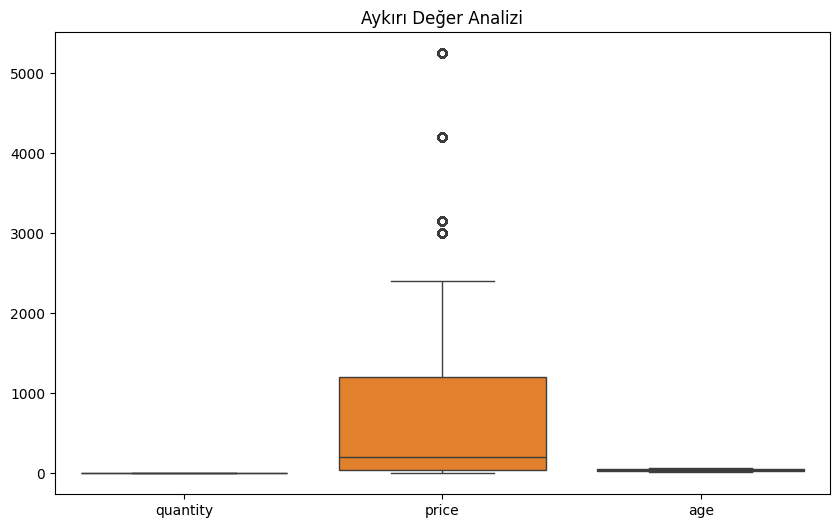

In [325]:
#  boxplot ile aykırı değer analizi

import matplotlib.pyplot as plt
# Sayısal değişkenler için boxplot çizimi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['quantity', 'price', 'age']])
plt.title('Aykırı Değer Analizi')
plt.show()


category
Books                15.15
Clothing            300.08
Cosmetics            40.66
Food & Beverage       5.23
Shoes               600.17
Souvenir             11.73
Technology         1050.00
Toys                 35.84
Name: unit_price, dtype: float64


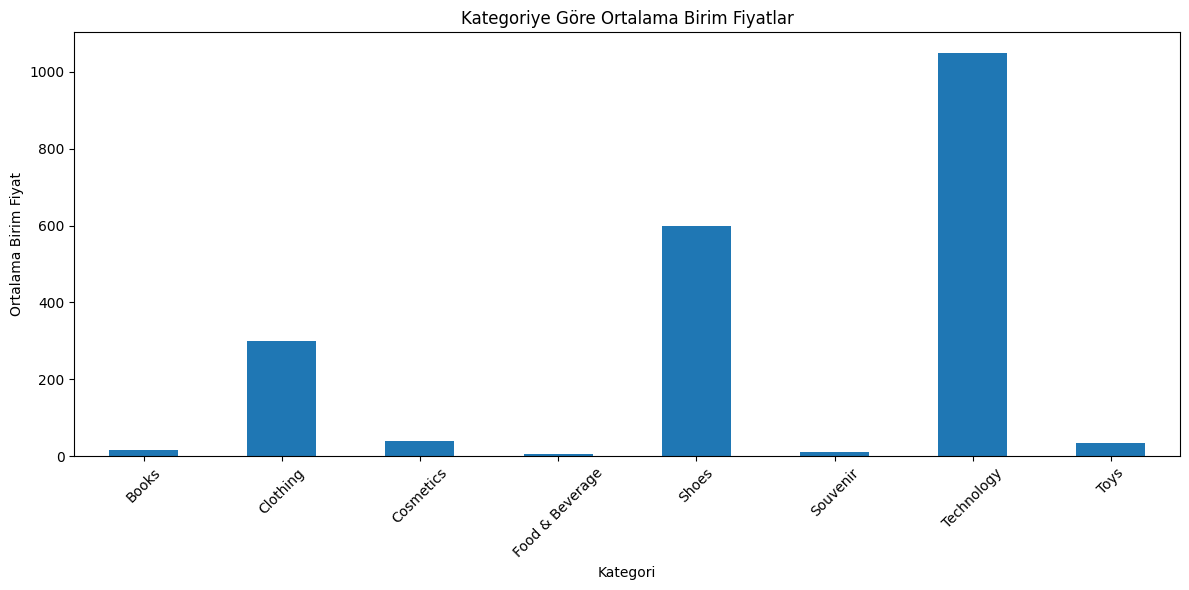

In [326]:
# prompt: kategoriye göre groupbye al  birim fiyat ortalamalarını yazdır ve grafikleştir

import matplotlib.pyplot as plt
# Kategoriye göre groupby al ve birim fiyat ortalamalarını hesapla
category_unit_prices = df.groupby('category')['unit_price'].mean()

# Sonuçları yazdır
print(category_unit_prices)

# Grafikleştir
plt.figure(figsize=(12, 6))
category_unit_prices.plot(kind='bar')
plt.title('Kategoriye Göre Ortalama Birim Fiyatlar')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Birim Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


invoice_date
2021    31316304.63
2022    31372826.18
2023     5862235.10
Name: price, dtype: float64


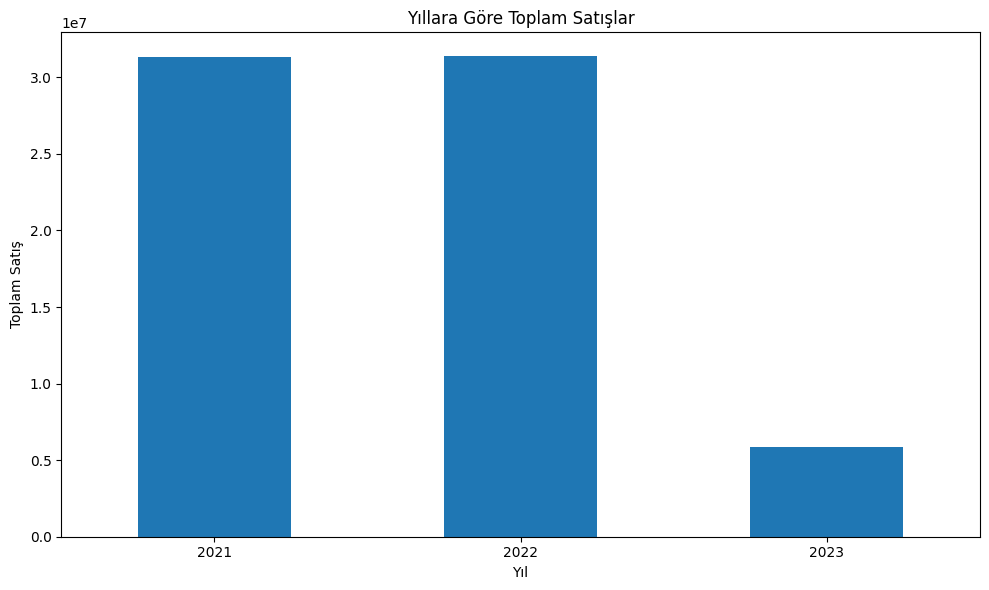

In [327]:
# prompt: invoce_date yıl bazlı satışa bak7

import matplotlib.pyplot as plt
# Yıl bazlı satışları hesapla
yearly_sales = df.groupby(df['invoice_date'].dt.year)['price'].sum()

# Sonuçları yazdır
print(yearly_sales)

# Grafikleştir
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title('Yıllara Göre Toplam Satışlar')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


invoice_date
1     11608
2     10482
3      8730
4      7487
5      7697
6      7581
7      7877
8      7635
9      7353
10     7764
11     7563
12     7680
Name: invoice_no, dtype: int64


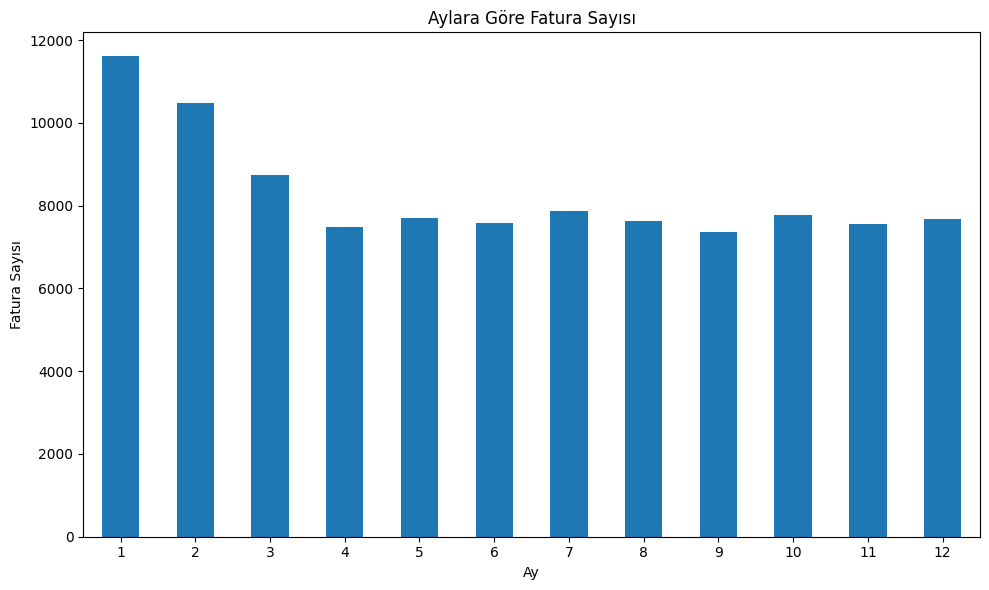

In [328]:
# prompt: invoce_no ay bazlı kırılımına bak

import matplotlib.pyplot as plt
# invoice_no'yu ay bazında kır
monthly_invoices = df.groupby(df['invoice_date'].dt.month)['invoice_no'].count()

# Sonuçları yazdır
print(monthly_invoices)

# Grafikleştir
plt.figure(figsize=(10, 6))
monthly_invoices.plot(kind='bar')
plt.title('Aylara Göre Fatura Sayısı')
plt.xlabel('Ay')
plt.ylabel('Fatura Sayısı')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [329]:
# prompt: hangi ay en çok ne satılmış

# Ay ve kategoriye göre satışları grupla
monthly_category_sales = df.groupby([df['invoice_date'].dt.month, 'category'])['quantity'].sum().reset_index()

# Her ay için en çok satılan kategoriyi bul
top_categories_by_month = monthly_category_sales.loc[monthly_category_sales.groupby(df['invoice_date'].dt.month)['quantity'].idxmax()]

# Sonuçları yazdır
print(top_categories_by_month)


    invoice_date         category  quantity
17             3         Clothing      9214
41             6         Clothing      7704
19             3  Food & Beverage      3886
57             8         Clothing      7591
25             4         Clothing      8020
49             7         Clothing      8588
33             5         Clothing      7978
9              2         Clothing     10985
83            11  Food & Beverage      3392
73            10         Clothing      8081
2              1        Cosmetics      5441
1              1         Clothing     11838


In [330]:
# prompt: yeni kolon ekle 18-25 =genç 25-40=genç yetişkin 40-70= yetişkin

# Yaş gruplarını belirleyen bir fonksiyon tanımla
def yas_grubu(yas):
  if 18 <= yas <= 25:
    return "Genç"
  elif 25 < yas <= 40:
    return "Genç Yetişkin"
  elif 40 < yas <= 70:
    return "Yetişkin"
  else:
    return "Diğer"

# Yeni kolonu oluştur ve yas_grubu fonksiyonunu kullanarak doldur
df["yas_grubu"] = df["age"].apply(yas_grubu)

# Sonucu kontrol et
print(df.head())


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  unit_price  days_since_start  \
0    Credit Card   2022-08-05          Kanyon      300.08               581   
1     Debit Card   2021-12-12  Forum Istanbul      600.17               345   
2           Cash   2021-11-09       Metrocity      300.08               312   
3    Credit Card   2021-05-16    Metropol AVM      600.17               135   
4           Cash   2021-10-24          Kanyon       15.15               296   

       yas_grubu  
0  Genç Yetişkin  
1           Genç  
2           Genç  
3       Yetişkin  
4       Y

category           Books    Clothing   Cosmetics  Food & Beverage  \
yas_grubu                                                           
Genç           46.776586  891.243785  122.855369        15.524436   
Genç Yetişkin  46.029802  896.914433  123.220255        15.852528   
Yetişkin       44.992559  906.011372  121.936580        15.618198   

category             Shoes   Souvenir   Technology        Toys  
yas_grubu                                                       
Genç           1819.483116  35.251094  3084.287617  108.878433  
Genç Yetişkin  1820.889993  35.094569  3148.598131  106.374095  
Yetişkin       1797.079232  34.687772  3181.343284  108.125492  


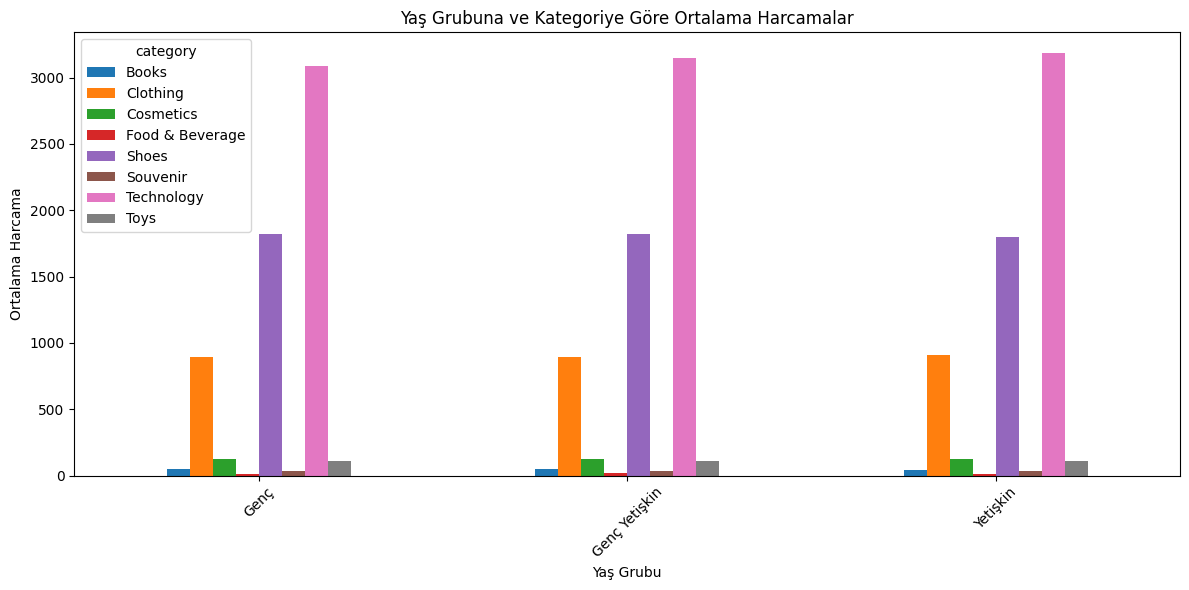

In [331]:
# prompt: yaş grubunub kategorisinde harcama ortalamalarını yazdır ve görselleştir

import matplotlib.pyplot as plt
# Yaş grubuna ve kategoriye göre groupby al ve ortalama harcamaları hesapla
yas_grubu_kategori_harcama = df.groupby(['yas_grubu', 'category'])['price'].mean().unstack()

# Sonuçları yazdır
print(yas_grubu_kategori_harcama)

# Grafikleştir
yas_grubu_kategori_harcama.plot(kind='bar', figsize=(12, 6))
plt.title('Yaş Grubuna ve Kategoriye Göre Ortalama Harcamalar')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Harcama')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [332]:
#IQR ile aykırı değer inceleme:

q1=df["price"].quantile(0.25)
q3=df["price"].quantile(0.75)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)
print(df[(df["price"]<low_limit) | (df["price"]>up_limit)].shape)
print(df[(df["price"]<low_limit) | (df["price"]>up_limit)].head())
print(df[(df["price"]<low_limit) | (df["price"]>up_limit)].index)


-1686.8549999999998
2932.625
(5024, 13)
   invoice_no customer_id  gender  age    category  quantity    price  \
3     I173702     C988172  Female   66       Shoes         5  3000.85   
15    I688768     C362288    Male   24       Shoes         5  3000.85   
23    I252275     C313348    Male   44  Technology         5  5250.00   
53    I160777     C626042  Female   43  Technology         4  4200.00   
69    I883721     C236859  Female   44  Technology         5  5250.00   

   payment_method invoice_date     shopping_mall  unit_price  \
3     Credit Card   2021-05-16      Metropol AVM      600.17   
15    Credit Card   2021-11-07    Viaport Outlet      600.17   
23           Cash   2021-10-26            Kanyon     1050.00   
53           Cash   2022-02-22         Metrocity     1050.00   
69    Credit Card   2021-11-19  Mall of Istanbul     1050.00   

    days_since_start yas_grubu  
3                135  Yetişkin  
15               310      Genç  
23               298  Yetişkin  
53  

In [333]:
# LOF ile çoklu değişken analizi yapıp aykırı değerleri yazdıralım:

from sklearn.neighbors import LocalOutlierFactor

# LOF modelini oluşturma
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Çoklu değişkenler üzerinde LOF analizi
df_numeric = df[['quantity', 'price', 'age']]
y_pred = lof.fit_predict(df_numeric)

# Aykırı değerlerin indekslerini bulma
outlier_index = np.where(y_pred == -1)[0]

# Aykırı değerleri yazdırma
print("Aykırı Değerler:")
print(df.iloc[outlier_index])

# Aykırı değer sayısını yazdırma
print("\nAykırı Değer Sayısı:", len(outlier_index))


Aykırı Değerler:
      invoice_no customer_id  gender  age    category  quantity    price  \
24       I174250     C204553  Female   42       Books         5    75.75   
75       I870944     C169749    Male   41    Souvenir         3    35.19   
82       I151332     C168491    Male   30    Souvenir         2    23.46   
90       I289643     C584700  Female   43  Technology         2  2100.00   
153      I141241     C143442    Male   54    Souvenir         5    58.65   
...          ...         ...     ...  ...         ...       ...      ...   
99334    I492905     C321290  Female   34       Books         1    15.15   
99353    I328528     C728472    Male   28       Books         4    60.60   
99413    I120044     C327276  Female   24  Technology         1  1050.00   
99432    I133264     C289915  Female   41       Books         2    30.30   
99452    I219422     C441542  Female   45    Souvenir         5    58.65   

      payment_method invoice_date     shopping_mall  unit_price  \
24 

Yukarıda inceleme yapıldığı üzere aykırı değerlerin silinmemesi gerektiğine karar verdim veri setinin sağlıklı  çeşitliliğe sahip olmadığını düşünüyorum. aynı veriler ve aynı kırılımlara sahip


In [334]:
# prompt: invoce no ile customer id yi dfden çıkar

df = df.drop(['invoice_no', 'customer_id'], axis=1)


In [335]:
# prompt: label encoder yapalım

from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Kategorik sütunları seç
categorical_cols = ['gender', 'category', 'payment_method', 'yas_grubu',"shopping_mall"]

# Her kategorik sütun için Label Encoding uygula
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

# Sonucu kontrol et
print(df.head())


   gender  age  category  quantity    price  payment_method invoice_date  \
0       0   28         1         5  1500.40               1   2022-08-05   
1       1   21         4         3  1800.51               2   2021-12-12   
2       1   20         1         1   300.08               0   2021-11-09   
3       0   66         4         5  3000.85               1   2021-05-16   
4       0   53         0         4    60.60               0   2021-10-24   

   shopping_mall  unit_price  days_since_start  yas_grubu  
0              4      300.08               581          1  
1              2      600.17               345          0  
2              6      300.08               312          0  
3              7      600.17               135          2  
4              4       15.15               296          2  


In [336]:
# prompt: invoice_date uçur

df = df.drop('invoice_date', axis=1)


In [337]:
# prompt: # prompt: standartlaştırma yap

from sklearn.preprocessing import StandardScaler

# Sayısal sütunları seç
numerical_cols = ['quantity', 'price', 'age', 'unit_price', 'days_since_start']

# StandardScaler oluştur
scaler = StandardScaler()

# Sayısal sütunları standartlaştır
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Sonucu kontrol et
print(df.head())


   gender       age  category  quantity     price  payment_method  \
0       0 -1.029160         1  1.412984  0.861837               1   
1       1 -1.496139         4 -0.002426  1.180703               2   
2       1 -1.562850         1 -1.417837 -0.413498               0   
3       0  1.505867         4  1.412984  2.456060               1   
4       0  0.638621         0  0.705279 -0.667945               0   

   shopping_mall  unit_price  days_since_start  yas_grubu  
0              4    0.266119          0.791247          1  
1              2    1.394081         -0.235420          0  
2              6    0.266119         -0.378979          0  
3              7    1.394081         -1.148979          2  
4              4   -0.804860         -0.448583          2  


Ortalama Doğruluk Skoru: 0.7990890505072472
Confusion Matrix:
 [[  23    0    0  919    0   79    0    1]
 [   0 6834   51    0    0    0    0    0]
 [   0    8 3051    0    0    0    0    0]
 [   0    0    0 2919    0    0    0    0]
 [   0    0    0    0 1940    0    1    0]
 [   0    0    0 1004    0    4    0    0]
 [   0    0    0    0    1    0  990    0]
 [   0    1 2066    0    0    0    0    0]]
Accuracy: 0.7923285743012266
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1022
           1       1.00      0.99      1.00      6885
           2       0.59      1.00      0.74      3059
           3       0.60      1.00      0.75      2919
           4       1.00      1.00      1.00      1941
           5       0.05      0.00      0.01      1008
           6       1.00      1.00      1.00       991
           7       0.00      0.00      0.00      2067

    accuracy                           0.79     19892
   macro avg       0.

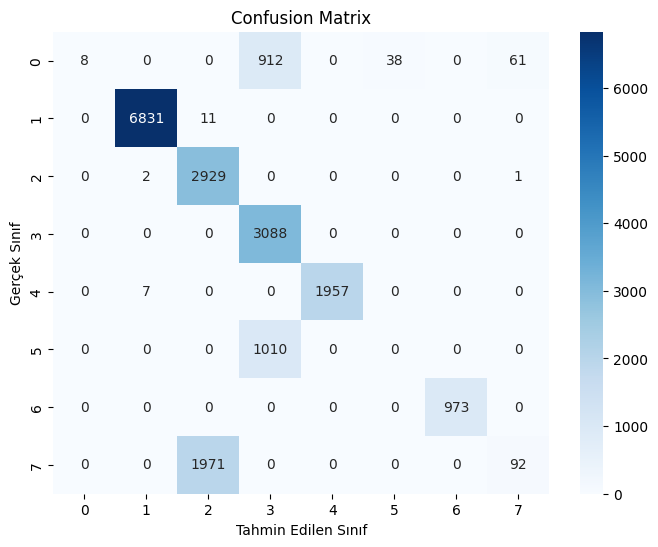

In [338]:
# prompt: bağımlı değişken= category k katlı validasyon uygulayalım logistik regresyon ile tahmin sonuçlarını confusion matrixle görselleştirelim

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Bağımlı ve bağımsız değişkenleri ayır
X = df.drop('category', axis=1)
y = df['category']

# K katlı çapraz doğrulama için KFold nesnesi oluştur
k = 5  # Kat sayısı
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Model oluştur
model = LogisticRegression()

# Çapraz doğrulama skorlarını hesapla
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Ortalama skoru yazdır
print("Ortalama Doğruluk Skoru:", scores.mean())

# Her kat için confusion matrix ve diğer metrikleri hesapla
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Modeli eğit
  model.fit(X_train, y_train)

  # Tahmin yap
  y_pred = model.predict(X_test)

  # Confusion matrix oluştur
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:\n", cm)

  # Accuracy skoru hesapla
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Diğer metrikleri yazdır
  print(classification_report(y_test, y_pred))

# Confusion matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()


In [339]:
# prompt: f1 prediction recall accuracy hesapla

from sklearn.metrics import precision_score, recall_score, f1_score

# ... (önceki kod)

# Her kat için confusion matrix ve diğer metrikleri hesapla
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Modeli eğit
  model.fit(X_train, y_train)

  # Tahmin yap
  y_pred = model.predict(X_test)

  # ... (diğer metrikler)

  # Precision, recall ve F1-score hesapla
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)


Precision: 0.726028815568841
Recall: 0.7923285743012266
F1-score: 0.7189773808681393
Precision: 0.7230128313357298
Recall: 0.8061532274281118
F1-score: 0.738561835485566
Precision: 0.8412964011974733
Recall: 0.8006636167110753
F1-score: 0.7313364829579229
Precision: 0.8221516250142253
Recall: 0.7980493690613846
F1-score: 0.7275371485008918
Precision: 0.787968094413896
Recall: 0.7982504650344376
F1-score: 0.7288526005244242
